<a href="https://colab.research.google.com/github/roy-sub/Data-Scientist-Interview-Course/blob/main/4.%20Deep%20Learning%20Algorithms%20using%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Artificial Neural Network and Cobvulational Neural Network**

In [25]:
# Importing the necessary packages and libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM, Bidirectional, GRU
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import load_iris
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [26]:
def evaluate_model(model, x_test, y_test):
    # Predict the labels for the test set
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate precision
    precision = Precision()
    precision.update_state(y_true, y_pred_classes)
    precision_result = precision.result().numpy()

    # Calculate recall
    recall = Recall()
    recall.update_state(y_true, y_pred_classes)
    recall_result = recall.result().numpy()

    # Calculate area under the ROC curve
    auc = AUC()
    auc.update_state(y_true, y_pred_classes)
    auc_result = auc.result().numpy()

    # Calculate accuracy
    accuracy = np.sum(y_true == y_pred_classes) / len(y_true)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_true, y_pred_classes)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred_classes)

    # Return the metrics
    return accuracy, precision_result, recall_result, auc_result, cm, mse, mae

In [27]:
def visualize_model_performance(history, cm):
    plt.figure(figsize=(18, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Draw the Confusion Matrix
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    plt.tight_layout()
    plt.show()

In [28]:
# Define a function to create a basic Artificial Neural Network (ANN) model
# Activation Function Options: 'sigmoid', 'tanh', 'linear', 'leaky_relu', 'hard_sigmoid', 'elu', 'selu', 'swish', 'softplus', 'softsign', 'gelu'

def create_ann(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.5), # Regularing the Data
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define a function to create a basic Convolutional Neural Network (CNN) model
# Activation Function Options: 'sigmoid', 'tanh', 'linear', 'leaky_relu', 'hard_sigmoid', 'elu', 'selu', 'swish', 'softplus', 'softsign', 'gelu'

def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)), # AveragePooling2D((2, 2)), GlobalAveragePooling2D(), GlobalMaxPooling2D(), FractionalPooling2D(pool_size=(2, 2))
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5), # Regularing the Data
        Dense(num_classes, activation='softmax')
    ])
    return model

In [29]:
def train_and_evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test,
                             epochs=10,
                             batch_size=32, # Defining Batch Size
                             data_augmentation=False,
                             callbacks=[EarlyStopping(monitor='val_loss', patience=3)]): # Callback function

    # Perform Data Augementation
    if data_augmentation:
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
        datagen.fit(x_train)

        # Train the model with data augmentation
        history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, epochs=epochs,
                            validation_data=(x_val, y_val),
                            callbacks=callbacks)
    else:
        # Train the model with the actual data
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                            validation_data=(x_val, y_val),
                            callbacks=callbacks)

    # Evaluate model performance
    accuracy, precision, recall, auc, cm, mse, mae = evaluate_model(model, x_test, y_test)

    return history, accuracy, precision, recall, auc, cm, mse, mae

##**1a. Artificial Neural Network ( ANN )**

In [30]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
# Create an ANN model
ann_model = create_ann(input_shape=X_train.shape[1:], num_classes=3)

# Define parameters for the model
params = {
    'optimizer': Adam(learning_rate=0.001, beta_1=0.9), # 'adam',
    'loss':'categorical_crossentropy',
    'metrics': ['accuracy'],
}

# Define a learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001
    decay = 0.1
    lr = initial_lr * math.pow(decay, math.floor((1+epoch)/10))
    return lr

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Add both callbacks to the callbacks list
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3),
    lr_scheduler
]

# Compile the model with the specified optimizer, loss function, and metrics
ann_model.compile(optimizer=params['optimizer'], loss=params['loss'], metrics=params['metrics'])

# Train and evaluate the model with the defined callbacks
history, accuracy, precision, recall, auc, cm, mse, mae = train_and_evaluate_model( ann_model, X_train, y_train, X_val, y_val, X_test, y_test, callbacks=callbacks)

In [32]:
# Print the evaluation metrics

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")
print(f"Confusion Matrix:\n{cm}")
print(f"MSE:\n{mse}")
print(f"MAE:\n{mae}")

print(history.history.keys())

Accuracy: 0.8
Precision: 1.0
Recall: 1.0
AUC: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  3  6]
 [ 0  0 11]]
MSE:
0.2
MAE:
0.2
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


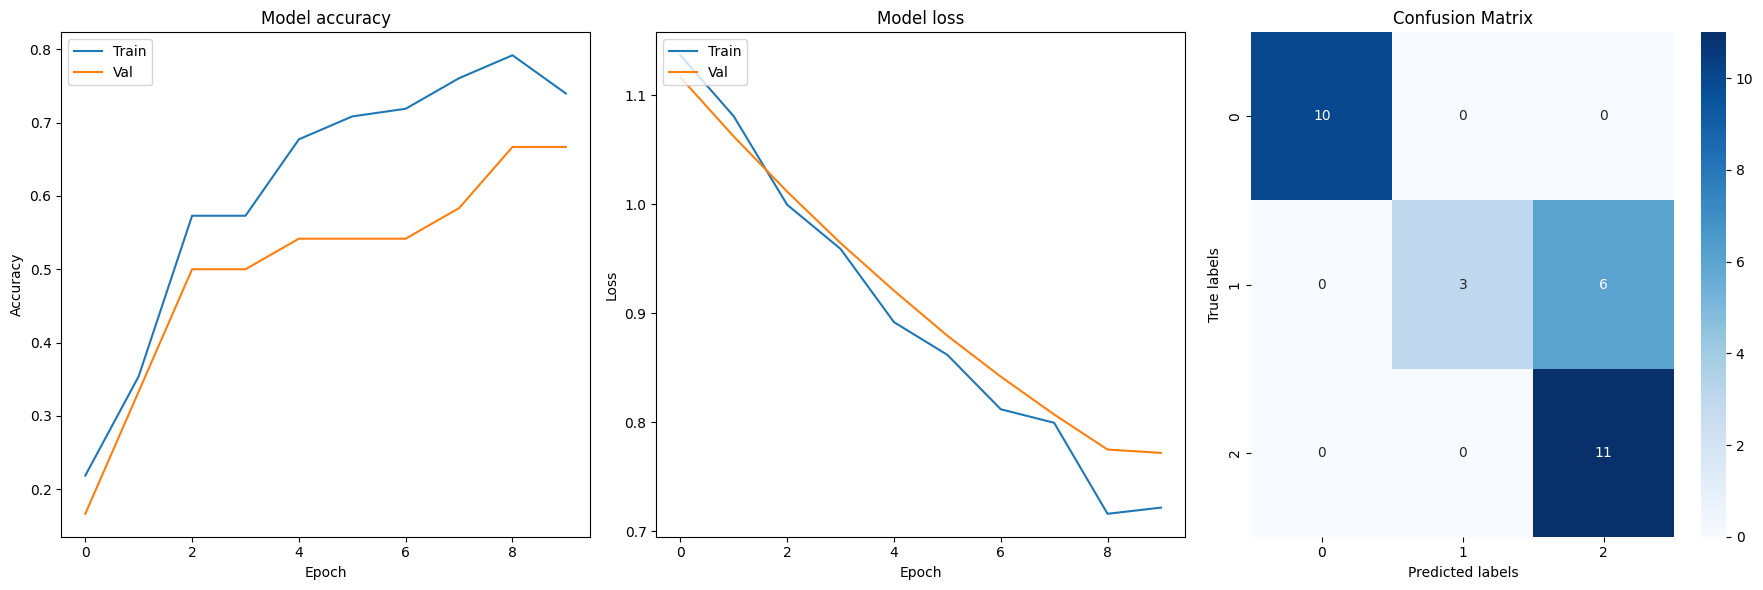

In [33]:
# Visualizing Model Performance
visualize_model_performance(history, cm)

##**1b. Convulational Neural Network ( ANN )**


In [34]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Create a CNN model
cnn_model = create_cnn(input_shape=X_train.shape[1:], num_classes=10)

# Define parameters for the model
params = {
    'optimizer': 'adam',
    'loss':'categorical_crossentropy',
    'metrics': ['accuracy'],
}

# Compile the model with the specified optimizer, loss function, and metrics
cnn_model.compile(optimizer=params['optimizer'], loss=params['loss'], metrics=params['metrics'])

# Train and evaluate the model with the defined callbacks
history, accuracy, precision, recall, auc, cm, mse, mae = train_and_evaluate_model( cnn_model, X_train, y_train, X_val, y_val, X_test, y_test, epochs = 2)

In [37]:
# Print the evaluation metrics

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")
print(f"Confusion Matrix:\n{cm}")
print(f"MSE:\n{mse}")
print(f"MAE:\n{mae}")

print(history.history.keys())

Accuracy: 0.9866
Precision: 0.9986709356307983
Recall: 0.9996674060821533
AUC: 0.9937112331390381
Confusion Matrix:
[[ 968    0    3    0    0    0    5    1    2    1]
 [   0 1127    1    4    0    0    0    1    2    0]
 [   0    1 1014    1    0    0    0   15    1    0]
 [   0    0    1 1003    0    1    0    5    0    0]
 [   0    0    0    0  972    0    6    0    2    2]
 [   1    0    0   12    0  874    2    1    1    1]
 [   1    2    0    0    1    5  949    0    0    0]
 [   0    1    5    0    0    0    0 1020    1    1]
 [   0    0    3    1    1    1    0    4  962    2]
 [   1    3    0    8    6    4    0    8    2  977]]
MSE:
0.2543
MAE:
0.0511
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


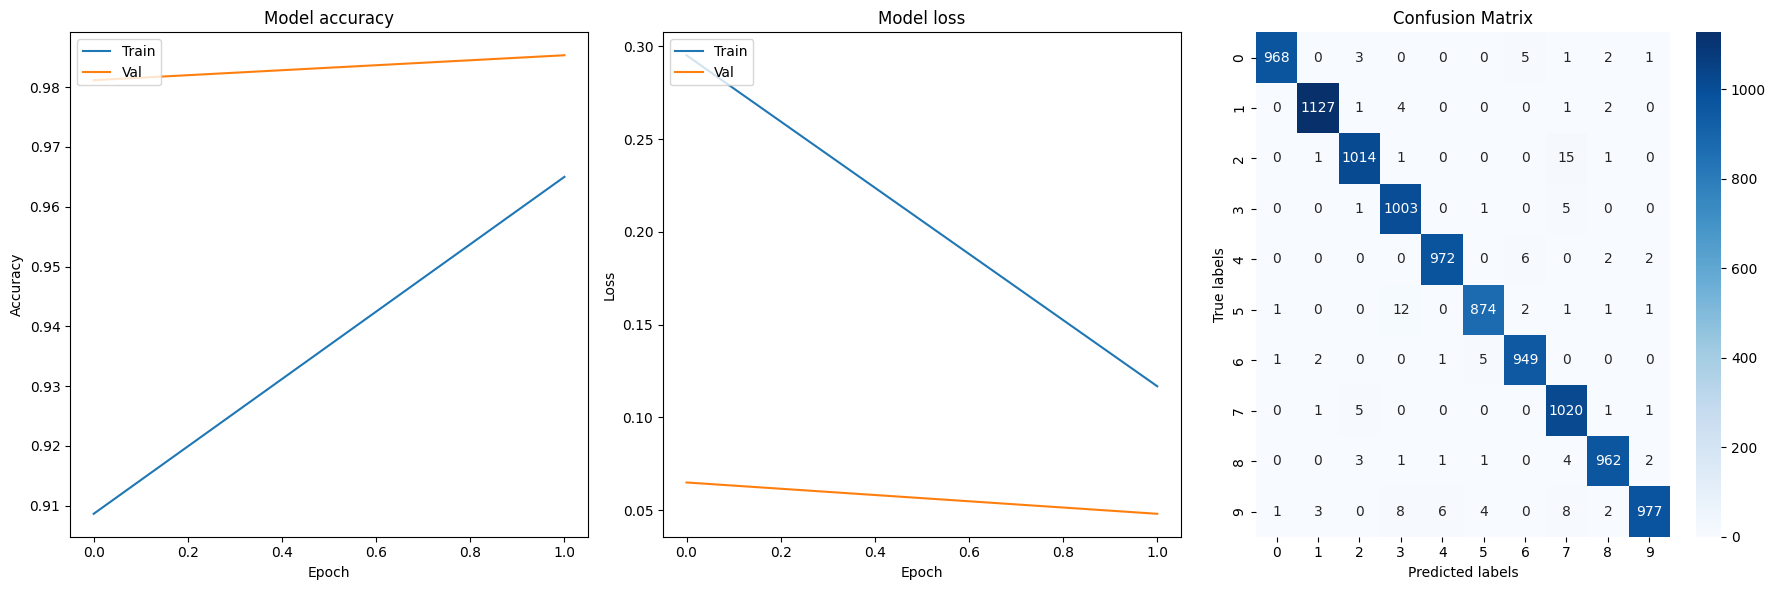

In [38]:
# Visualizing Model Performance
visualize_model_performance(history, cm)

#**2. Recurrent Neural Network ( RNN )**

In [39]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for RNN input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Create an RNN model
model = tf.keras.models.Sequential([
    SimpleRNN(64, input_shape=(1, X_train.shape[2]), return_sequences=True, kernel_initializer='glorot_uniform'),
    Dropout(0.2),
    SimpleRNN(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              # metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate the model
# loss, accuracy, precision, recall, auc = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss}, Test Accuracy: {accuracy}, Test Precision: {precision}, Test Recall: {recall}, Test AUC: {auc}")

loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)
cm = confusion_matrix(y_test, y_pred)

In [42]:
print(f"Test Loss: {loss}, \nTest Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

print(history.history.keys())

Test Loss: 0.2799099385738373, 
Test Accuracy: 0.9736841917037964
Confusion Matrix:
[[41  2]
 [ 1 70]]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


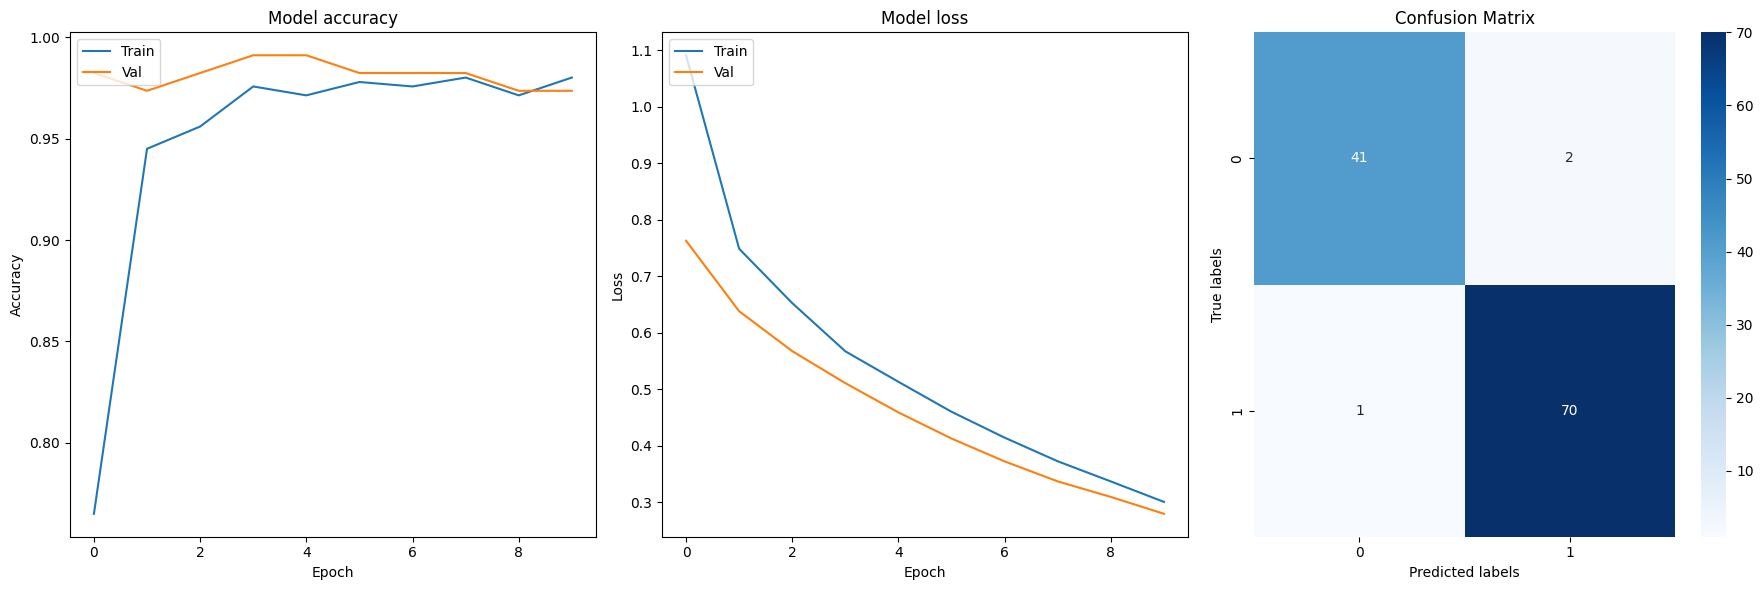

In [43]:
def plot_history(history, cm):
    plt.figure(figsize=(18, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Draw the Confusion Matrix
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    plt.tight_layout()
    plt.show()

plot_history(history, cm)